In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Runge-Kutta Schemes for Solving ODEs

So, let $x(t)\in \mathbb{R}^{n}$, and suppose it satisfies some system of differential equations succintly represented by the equation 

$$
\frac{dx}{dt} = f(x,t), ~ x(0) = x_{0}
$$

As we know, the chances that you can solve this exactly are essentialy zero (though you might be surprised how close you can get sometimes, but that's another matter).  Thus numericaly solutions become essential.  Pound for pound, the most popular technique used to address this matter is the 4th-order Runge-Kutta (RK) method.  But before we babble about that, let's briefly discuss what it means to numerically solve an ODE.  

The first thing to understand is that we necessarily must discretize time, since of course we cannot store a continuum of temporal information on a computer.  Thus, what we are interested in finding are the values

$$
x_{j} = x(t_{j}), ~ t_{j} = j\delta t, ~, j=0,1,\cdots
$$

Using integration, we have that

$$
x_{j+1} = x_{j} + \int_{t_{j}}^{t_{j}+\delta t} f(x(s),s) ds.
$$

Now, there are an infinite number of ways to find approximate solutions to this equation.  For example, we can use the Trapezoid method to find 

$$
\int_{t_{j}}^{t_{j}+\delta t} f(x(s),s) ds = \frac{\delta t}{2}\left(f(x_{j},t_{j}) + f(x_{j+1},t_{j+1}) \right) + \mathcal{O}(\delta t^{3}),
$$

so that we can find $x_{j+1}$ by solving the nonlinear equation

$$
x_{j+1} = x_{j} + \frac{\delta t}{2}\left(f(x_{j},t_{j}) + f(x_{j+1},t_{j+1}) \right).
$$

The fact that we need to solve a nonlinear system to find $x_{j+1}$ makes our approximation scheme _ implicit _.  The fact that the local order of error is $\mathcal{O}(\delta t^{3})$ makes the method locally third order, and globally second order.  Following in this vein of thought takes you down the road of collocation schemes, Adams-Bashforth and Adams-Moulton methods.   

Runge-Kutta schemes are a bit different.  The idea behind them is one of stages.  For example then, a two-stage RK scheme proposes an update via the formula 

$$
x_{j+1} = x_{j} + \delta t\left(ak_{1} + bk_{2}\right)
$$

where

\begin{align}
k_{1} = & f(x_{j},t_{j})\\
k_{2} = & f(x_{j}+\beta k_{1} \delta t ,t_{j} + \alpha \delta t).
\end{align}

The way to determine the coefficients $a$, $b$, $\alpha$, and $\beta$ is to first Taylor expand the integral equation, which involves using the expansion

\begin{align}
f(x(s),s) = & f(x_{j} + \dot{x}_{j}(s-t_{j}) + \mathcal{O}((s-t_{j})^{2},t_{j} + (s-t_{j}))\\
= & f(x_{j},t_{j}) + \left(f_{x}(x_{j},t_{j})f(x_{j},t_{j}) + f_{t}(x_{j},t_{j})\right)(s-t_{j}) + \mathcal{O}((s-t_{j})^{2}
\end{align}

so that 

\begin{align}
x_{j+1} = & x_{j} + \int_{t_{j}}^{t_{j}+\delta t}\left(f(x_{j},t_{j}) + \left(f_{x}(x_{j},t_{j})f(x_{j},t_{j}) + f_{t}(x_{j},t_{j})\right)(s-t_{j}) + \mathcal{O}((s-t_{j})^{2}\right) ds\\
= & x_{j} + \delta t f(x_{j},t_{j}) + \frac{\delta t^{2}}{2}\left(f_{x}(x_{j},t_{j})f(x_{j},t_{j}) + f_{t}(x_{j},t_{j})\right) + \mathcal{O}(\delta t^{3}).
\end{align}

If we then Taylor expand the expression for $k_{2}$ so that 

$$
k_{2} = f(x_{j},t_{j}) + \delta t \left(\beta f_{x}(x_{j},t_{j})f(x_{j},t_{j}) + \alpha f_{t}(x_{j},t_{j})\right) + \mathcal{O}\left(\delta t^{2}\right),
$$

and thus

$$
x_{j+1} = x_{j} + \delta t(a+b)f(x_{j},t_{j}) + \delta t^{2}b\left(\beta f_{x}(x_{j},t_{j})f(x_{j},t_{j}) + \alpha f_{t}(x_{j},t_{j})\right) + \mathcal{O}(\delta t^{3}),
$$

which then leads us to match coefficients so that 

\begin{align}
a+b = & 1,\\
b\beta = & \frac{1}{2},\\
b\alpha = & \frac{1}{2}.
\end{align}

The simplest way to satisfy this system of equations is to set $a=b=\frac{1}{2}$, so that $\alpha=\beta=1$, giving us the 2-stage RK method

\begin{align}
k_{1} = & f(x_{j},t_{j}),\\
k_{2} = & f(x_{j}+ k_{1} \delta t ,t_{j} + \delta t),
\end{align}

$$
x_{j+1} = x_{j} + \frac{\delta t}{2}\left(k_{1} + k_{2}\right).
$$

This method essentially averages two estimates for the slope of the solution over a given time step.  Obviously, we can derive an infinite number of approximations, and there is a wide ranging theory on how best to do this.  

Turning to a specific example, we look at the ODE

$$
\dot{x} = x(1-x) + \sin(t), ~ x(0) = \frac{1}{2}.
$$

So, to use the RK-2 scheme above in Python, we would do the following

In [27]:
def f(x,t):
    return x*(1.-x) + np.sin(t)

def rk2(f,xj,tj,dt):
    k1 = f(xj,tj)
    k2 = f(xj+dt*k1,tj+dt)
    return xj + dt/2.*(k1+k2)

def ode_solver(f,x0,tf,dt):
    # This program solves the ode dx/dt = f(x,t) for x(0) = x0
    # for 0<= t <= tf with time step dt.  
    
    nstep = int(np.round(tf/dt))
    sol = np.zeros(nstep)
    tvals = np.zeros(nstep)
    sol[0] = x0
    for jj in xrange(1,nstep):
        tj = (jj-1)*dt
        sol[jj] = rk2(f,sol[jj-1],tj,dt)
        tvals[jj] = tj+dt
    plt.plot(tvals,sol,color='k',ls='-')
    plt.xlabel('$t$')
    plt.ylabel('$x(t)$')

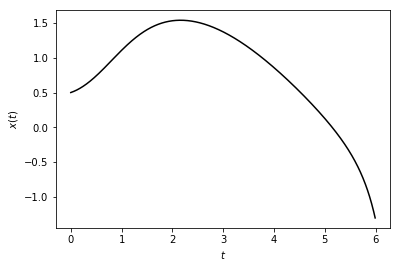

In [31]:
ode_solver(f,.5,6.,1e-2)

So that's actually a pretty interesting result.  We know that $x_{\ast}=1$ is a stable fixed point of 

$$
\dot{x} = x(1-x),
$$

and that $x_{\ast}=0$ is unstable.  Of course, we have now added an extra periodic forcing via the $\sin(t)$ term.  So, it is not really shocking that the forcing can pull us up to and above the stable fixed point, and that we oscillate back across it.  What is surprising in some sense is that it keeps going to the unstable point around zero, after which the solution in effect starts to blow up.  

A fundamental question we then need to ask ourselves is, is this right?  We of course know there is the error of truncation and discretization.  We can address this issue by just picking a smaller time step.  So if above we used a time step of $\delta t = 10^{-2}$, what happens if we use a time step of $\delta t = 10^{-3}$? 

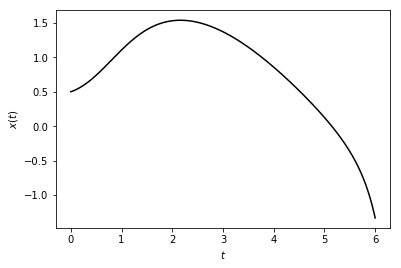

In [32]:
ode_solver(f,.5,6.,1e-3)

Okay, nothing really changed in our plot of the solution using a time step that is a tenth smaller, and thus a hundred times more accurate.  That's a pretty good sign we are on to something here.  But being able to compare to something analytical really would be nice.  So what I would recommend in that case is to do the following.  Let's look at a similar ODE, say 

$$
\dot{x} = x(1-x) + \epsilon \sin(t), ~ x(0) = \tilde{x}_{0}
$$

where we are going to think of $0<\epsilon \ll 1$.  To get an analytical result, we use a _regular perturbation expansion_, in which we let 

$$
x(t) = x_{0}(t) + \epsilon x_{1}(t) + \epsilon^{2}x_{2}(t) + \cdots,
$$

so that when we substitute this expansion into our ODE and match powers of $\epsilon$ we get

\begin{align}
\dot{x}_{0} = & x_{0}(1-x_{0})\\
\dot{x}_{1} = &(1-2x_{0})x_{1} + \sin(t)
\end{align}

and we require

$$
x_{0}(0) = \tilde{x}_{0}, ~ x_{j}(0) = 0, ~j\geq 1.
$$

We readily find that 

$$
x_{0}(t) = \frac{\tilde{x}_{0}e^{t}}{1 + \tilde{x}_{0}(e^{t}-1)}.
$$

To get the next order term, you will just have to believe me that

$$
\int_{0}^{t} \left(1-2x_{0}(s)\right)ds = \int_{0}^{t}\frac{1-\tilde{x}_{0}(e^{s}+1)}{1+\tilde{x}_{0}(e^{s}-1)}ds  = \log\left|\frac{e^{t}}{(1-\tilde{x}_{0} + \tilde{x}_{0}e^{t})^{2}} \right|,
$$

so that we can find 

\begin{align}
x_{1}(t) = & \frac{e^{t}}{(1-\tilde{x}_{0} + \tilde{x}_{0}e^{t})^{2}}\int_{0}^{t}\sin(s)e^{-s}\left(1-\tilde{x}_{0} + \tilde{x}_{0}e^{s}\right)^{2}ds\\
= & \frac{e^{t}}{(1-\tilde{x}_{0} + \tilde{x}_{0}e^{t})^{2}}\left(\frac{(1-\tilde{x}_{0})^{2}}{2}\left(1-(\sin(t)+\cos(t))e^{-t}\right) +2\tilde{x}_{0}(1-\tilde{x}_{0})(1-\cos(t)) + \frac{\tilde{x}_{0}^{2}}{2}\left(1+(\sin(t)-\cos(t))e^{t}\right)\right)
\end{align}

To wit, if we now modify our code and add a means for finding our analytic solution, we get

In [43]:
def fep(x,t,ep):
    return x*(1.-x) + ep*np.sin(t)

def rk2ep(f,xj,tj,dt,ep):
    k1 = f(xj,tj,ep)
    k2 = f(xj+dt*k1,tj+dt,ep)
    return xj + dt/2*(k1+k2)

def tsol(xi,t,ep):
    st = np.sin(t)
    ct = np.cos(t)
    et = np.exp(t)
    x0 = xi*et/(1+xi*(et-1))
    x1 = (et/(1-xi+xi*et)**2.)*((1-xi)**2.*(1-(st+ct)/et)/2. + 2.*xi*(1.-xi)*(1.-ct) + xi**2./2.*(1.+(st-ct)*et))
    return x0 + ep*x1

def ode_solver(f,x0,tf,dt,ep):
    # This program solves the ode dx/dt = f(x,t) for x(0) = x0
    # for 0<= t <= tf with time step dt.  
    
    nstep = int(np.round(tf/dt))
    asol = np.zeros(nstep)
    rsol = np.zeros(nstep)
    tvals = np.zeros(nstep)
    asol[0] = x0
    rsol[0] = x0
    for jj in xrange(1,nstep):
        tj = (jj-1)*dt
        asol[jj] = rk2ep(f,asol[jj-1],tj,dt,ep)
        tvals[jj] = tj+dt
        rsol[jj] = tsol(x0,tvals[jj],ep)
        
    plt.plot(tvals,asol,color='k',ls='-',label='Numerics')
    plt.plot(tvals,rsol,color='r',ls='--',label='Asymptotics')
    
    plt.xlabel('$t$')
    plt.ylabel('$x(t)$')
    plt.legend(loc=(.1,.1))


If we let $\epsilon = .1$ and take $\delta t = 10^{-2}$ for $0\leq t \leq 10$ we get 

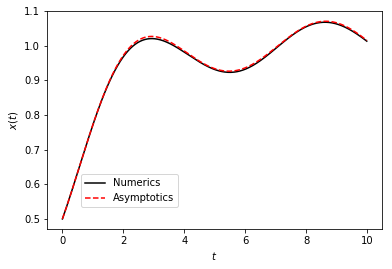

In [44]:
ode_solver(fep,.5,10.,1e-2,.1)

So that is fantastic.  Not only do we now have an analytic representation for our solution, but we have also shown that our numerical method is reliably recreating the dynamics.  Further, we see for the relatively weaker forcing that we in fact do oscillate around the stable fixed point.  To wit, because we have an analytic approximation, we can even show that 

$$
\lim_{t\rightarrow \infty} x(t) \approx 1 + \frac{\epsilon}{2}\left(\sin(t) -\cos(t)\right), 
$$

which makes clear the fact that for relatively weak forcing, we oscillate about the stable fixed point.  

From this, we can also start to figure out what value of $\epsilon$ makes the forcing too strong such that you no longer oscillate around the stable fixed point.  So we form the following plots for increasing values of $\epsilon$. 

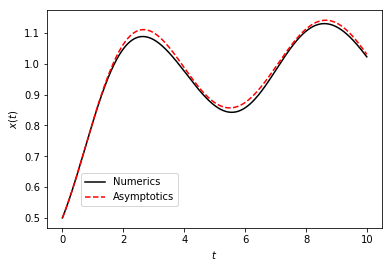

In [45]:
ode_solver(fep,.5,10.,1e-2,.2)

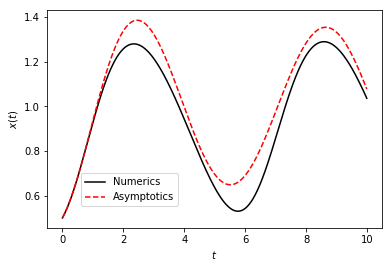

In [48]:
ode_solver(fep,.5,10.,1e-2,.5)

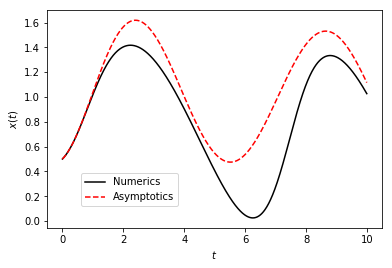

In [52]:
ode_solver(fep,.5,10.,1e-2,.75)

So, we see that by the time $\epsilon=.75$, the forcing is strong enough to drive the solution close to the unstable fixed point.  Further, we see that significant deformations between the numerics and asymptotics have appeared, which in fact makes sense since now the $\epsilon^{2}$ and higher order terms we have ignored up till now have become more signigicant.  

Now, as a last point, we note that we will not be using 2-stage RK methods throughout the rest of the course.  Instead, we will use the classic 4-stage method which is given by 

\begin{align}
k_{1} = & f(x_{j},t_{j}),\\
k_{2} = & f\left(x_{j}+ k_{1} \frac{\delta t}{2} ,t_{j} + \frac{\delta t}{2}\right),\\
k_{3} = & f\left(x_{j}+ k_{2} \frac{\delta t}{2} ,t_{j} + \frac{\delta t}{2}\right),\\
k_{4} = & f\left(x_{j}+ k_{3} \delta t ,t_{j} + \delta t\right)
\end{align}

$$
x_{j+1} = x_{j} + \frac{\delta t}{6}\left(k_{1} + 2k_{2} + 2k_{3} + k_{4}\right).
$$

This method should have local accuracy of $\mathcal{O}(\delta t^{5})$ and global error of $\mathcal{O}(\delta t^{4})$.  You will explore this issue in the homework.  